<a href="https://colab.research.google.com/github/JLMR-Code-Creator/Taller_VC_Codigo/blob/main/Filtros_convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Bibliotecas**  

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Fig0333.tif to Fig0333.tif
Saving Fig0335.tif to Fig0335.tif
User uploaded file "Fig0333.tif" with length 250415 bytes
User uploaded file "Fig0335.tif" with length 200566 bytes


**2. Leer imagen**

In [3]:
img = cv.imread('Fig0333.tif', 0)

3. Opción para imfliter de matlab con **OPENCV**

In [4]:
kernel_3x3 = np.ones((3,3), np.float32) / 9.0
kernel_5x5 = np.ones((5,5),np.float32) / 25.0
kernel_7x7 = np.ones((7,7), np.float32) / 49.0

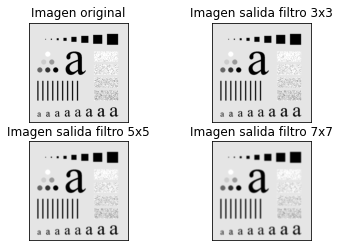

In [5]:
output3x3 = cv.filter2D(img, -1, kernel_3x3)
output5x5 = cv.filter2D(img, -1, kernel_5x5)
output7x7 = cv.filter2D(img, -1, kernel_7x7)

plt.subplot(2,2,1),plt.imshow(img, cmap='gray'), plt.title('Imagen original')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(output3x3, cmap='gray'), plt.title('Imagen salida filtro 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(output5x5, cmap='gray'), plt.title('Imagen salida filtro 5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(output7x7, cmap='gray'), plt.title('Imagen salida filtro 7x7')
plt.xticks([]), plt.yticks([])
plt.show()

Como opción sería crear una función con el nombre de imfilter 

In [ ]:
def imfilter(f, w):
   g = cv.filter2D(f, -1, w)  
   return g

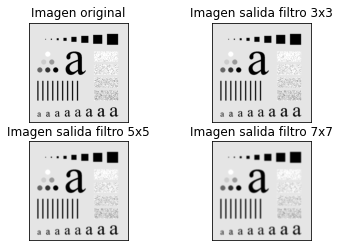

In [ ]:
output3x3 = imfilter(img, kernel_3x3)
output5x5 = imfilter(img, kernel_5x5)
output7x7 = imfilter(img, kernel_7x7)

plt.subplot(2,2,1),plt.imshow(img, cmap='gray'), plt.title('Imagen original')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(output3x3, cmap='gray'), plt.title('Imagen salida filtro 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(output5x5, cmap='gray'), plt.title('Imagen salida filtro 5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(output7x7, cmap='gray'), plt.title('Imagen salida filtro 7x7')
plt.xticks([]), plt.yticks([])
plt.show()

Agregar ruido gaussiano a una imagen

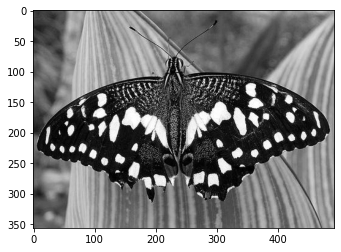

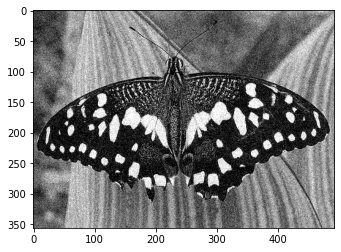

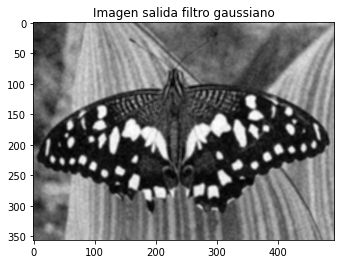

In [ ]:
from skimage.util import random_noise
plt.imshow(img, cmap='gray')
plt.show();
img_ruido = random_noise(img, mode='gaussian')

plt.imshow(img_ruido, cmap='gray')
plt.show()

blurred = cv.GaussianBlur(img_ruido, (5, 5), 3)
plt.imshow(blurred, cmap='gray')
plt.title('Imagen salida filtro gaussiano')
plt.show()

from skimage.util import random_noise
img_ruido = random_noise(img, mode='s&p')
img_ruido = cv.normalize(img_ruido, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

plt.imshow(img_ruido, cmap='gray')
plt.show()


4. Filtros no lineales   Opción **ordfilter2** de Matlab con **OPENCV**
- medfilt2  Mediana



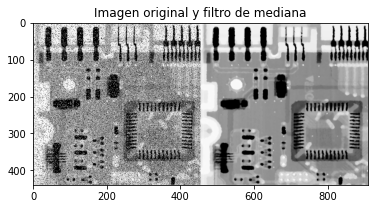

In [ ]:
img = cv.imread('Fig0335.tif', 0)
mediana = cv.medianBlur(img, 5)

comparativa = np.concatenate((img, mediana), axis=1) 
plt.imshow(comparativa, cmap='gray')
plt.title('Imagen original y filtro de mediana')
plt.show()


- Máximo    ordfilt2
- Mínimo    ordfilt2
Corresponde a operaciones morfológicas

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

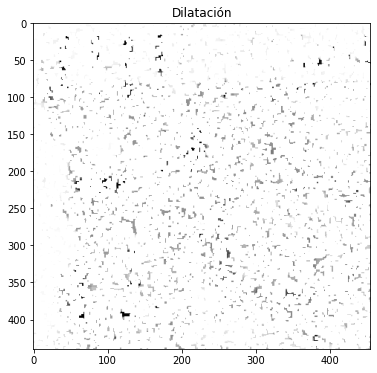

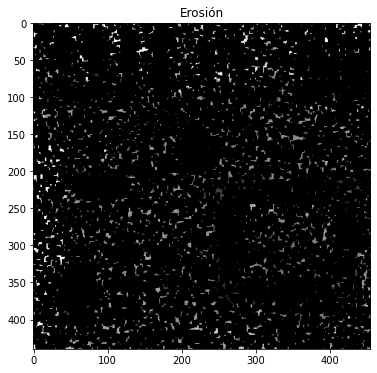

In [ ]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
display(kernel)

imgMax= cv.dilate(img, kernel) # Máximo
plt.figure(figsize=(8, 6))
plt.imshow(imgMax, cmap='gray')
plt.title('Dilatación')
plt.show()

imgMin = cv.erode(img, kernel) # Mínimo
plt.figure(figsize=(8, 6))
plt.imshow(imgMin, cmap='gray')
plt.title('Erosión')
plt.show()


5. Filtros detectores de bordes con **OPENCV**

*   h = fspecial('average',hsize)





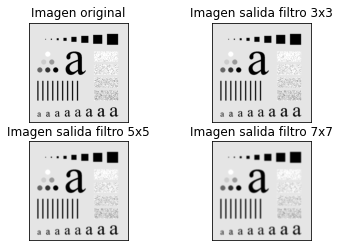

In [7]:
img = cv.imread('Fig0333.tif', 0)
average_3 = cv.blur(img, ksize = (3, 3)) #es lo mismo que ocupar output3x3 = cv.filter2D(img, -1, kernel_3x3)
average_5 = cv.blur(img, ksize = (5, 5))
average_7 = cv.blur(img, ksize = (7, 7))

plt.subplot(2,2,1),plt.imshow(img, cmap='gray'), plt.title('Imagen original')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(average_3, cmap='gray'), plt.title('Imagen salida filtro 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(average_5, cmap='gray'), plt.title('Imagen salida filtro 5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(average_7, cmap='gray'), plt.title('Imagen salida filtro 7x7')
plt.xticks([]), plt.yticks([])
plt.show()

*   h = fspecial('gaussian',hsize,sigma)


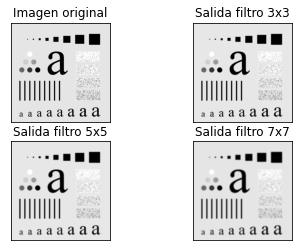

In [12]:

img = cv.imread('Fig0333.tif', 0)

Gaussian_3 = cv.GaussianBlur(img, ksize = (3, 3), sigmaX=3)
Gaussian_5 = cv.GaussianBlur(img, ksize = (5, 5), sigmaX=3)
Gaussian_7 = cv.GaussianBlur(img, ksize = (7, 7), sigmaX=3)

plt.subplot(2,2,1),plt.imshow(img, cmap='gray'), plt.title('Imagen original')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(Gaussian_3, cmap='gray'), plt.title('Salida filtro 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(Gaussian_5, cmap='gray'), plt.title('Salida filtro 5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(Gaussian_7, cmap='gray'), plt.title('Salida filtro 7x7')
plt.xticks([]), plt.yticks([])
plt.show()

*   h = fspecial('laplacian',alpha)

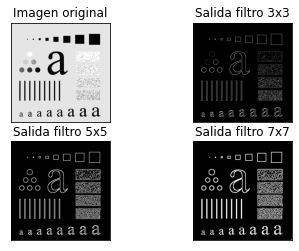

In [20]:
img = cv.imread('Fig0333.tif', 0)

Laplacian_3 = cv.Laplacian( img, -1, cv.CV_8U, ksize = 3, delta=0 )
Laplacian_5 = cv.Laplacian( img, -1, cv.CV_8U, ksize = 5, delta=0 )
Laplacian_7 = cv.Laplacian( img, -1, cv.CV_8U, ksize = 7, delta=0 )

plt.subplot(2,2,1),plt.imshow(img, cmap='gray'), plt.title('Imagen original')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(Laplacian_3, cmap='gray'), plt.title('Salida filtro 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(Laplacian_5, cmap='gray'), plt.title('Salida filtro 5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(Laplacian_7, cmap='gray'), plt.title('Salida filtro 7x7')
plt.xticks([]), plt.yticks([])
plt.show()

*   h = fspecial('log',hsize,sigma)

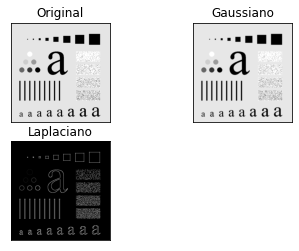

In [22]:
img = cv.imread('Fig0333.tif', 0)
Gaussian = cv.GaussianBlur(img, ksize = (3, 3), sigmaX=3)
LoG = cv.Laplacian(Gaussian, cv.CV_8U, ksize=3)

plt.subplot(2,2,1),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(Gaussian, cmap = 'gray')
plt.title('Gaussiano'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(LoG, cmap = 'gray')
plt.title('Laplaciano'), plt.xticks([]), plt.yticks([])
plt.show()

*   h = fspecial('disk',radius)  
*   h = fspecial('motion',len,theta)
*   OpernCV los integra por separado, son para procesamiento de video  cv::videostab::GaussianMotionFilter 
*   No tengo un ejemplo para esto.

Operador **roberts**

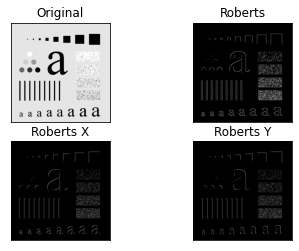

In [23]:
img = cv.imread('Fig0333.tif', 0)
roberts_vertical = np.array( [[ 0, 0, 0 ],
                              [ 0, 1, 0 ],
                              [ 0, 0,-1 ]])
roberts_horizontal = np.array( [[ 0, 0, 0 ],
                                [ 0, 0, 1 ],
                                [ 0,-1, 0 ]])

img_roberts_x = cv.filter2D(img, -1, roberts_vertical)
img_roberts_y = cv.filter2D(img, -1, roberts_horizontal)

plt.subplot(2,2,1),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_roberts_x + img_roberts_y, cmap = 'gray')
plt.title('Roberts'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(img_roberts_x, cmap = 'gray')
plt.title('Roberts X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(img_roberts_y, cmap = 'gray')
plt.title('Roberts Y'), plt.xticks([]), plt.yticks([])
plt.show()

Operador **prewitt**
*   h = fspecial('prewitt')

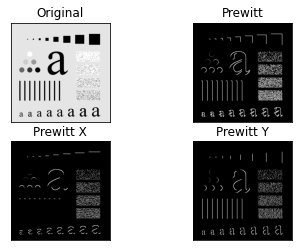

In [24]:
img = cv.imread('Fig0333.tif', 0)
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv.filter2D(img, -1, kernelx)
img_prewitty = cv.filter2D(img, -1, kernely)

plt.subplot(2,2,1),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_prewittx + img_prewitty, cmap = 'gray')
plt.title('Prewitt'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(img_prewittx, cmap = 'gray')
plt.title('Prewitt X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(img_prewitty, cmap = 'gray')
plt.title('Prewitt Y'), plt.xticks([]), plt.yticks([])
plt.show()

Operador **sobel**
*   h = fspecial('sobel')

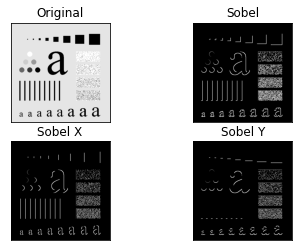

In [25]:
img = cv.imread('Fig0333.tif', 0)
img_sobel_x = cv.Sobel(img, cv.CV_8U, 1, 0, ksize=3)
img_sobel_y = cv.Sobel(img, cv.CV_8U, 0, 1, ksize=3)

plt.subplot(2,2,1),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_sobel_x + img_sobel_y, cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(img_sobel_x, cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(img_sobel_y, cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()


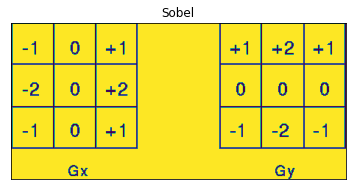

In [ ]:
sobel = media.read_image('https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/sobmasks.gif')
plt.imshow(sobel)
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.show()

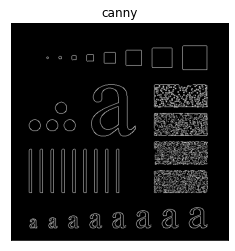

In [26]:
img = cv.imread('Fig0333.tif', 0)
canny = cv.Canny(img, 50, 255)
plt.imshow(canny,cmap = 'gray')
plt.title('canny'), plt.xticks([]), plt.yticks([])
plt.show()